In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
df = pd.read_csv('data/db.csv')
new_df = df.dropna()

In [4]:
def ganancias_cleaning(x):
    if x == "NI":
        return "NI"
    elif x == "AC":
        return "AC"
    elif x == "EX":
        return "EX"
    elif x == "NC":
        return "NC"
    else:
        return


In [5]:
new_df["IMP_GANANCIAS"] = new_df["IMP_GANANCIAS"].apply(ganancias_cleaning)

In [6]:
new_df.dropna(inplace= True)

In [7]:
new_df['IMP_GANANCIAS'].describe()

count     5591922
unique          4
top            NI
freq      4130598
Name: IMP_GANANCIAS, dtype: object

In [8]:
def iva_cleaning(x):
    if x == "NI":
        return "NI"
    elif x == "AC":
        return "AC"
    elif x == "EX":
        return "EX"
    elif x == "NA":
        return "NA"
    elif x == "XN":
        return "XN"
    elif x == "AN":
        return "AN"
    else:
        return

In [9]:
new_df["IMP_IVA"] = new_df["IMP_IVA"].apply(iva_cleaning)

In [10]:
new_df.dropna(inplace= True)

In [11]:
new_df['IMP_IVA'].describe()

count     5591912
unique          5
top            NI
freq      4307608
Name: IMP_IVA, dtype: object

In [12]:
def soc_cleaning(x):
    if x == "N":
        return "N"
    elif x == "S":
        return "S"
    else:
        return

In [13]:
new_df["INTEGRANTE_SOC"] = new_df["INTEGRANTE_SOC"].apply(soc_cleaning)

In [14]:
new_df.dropna(inplace= True)

In [15]:
new_df['INTEGRANTE_SOC'].describe()

count     5591783
unique          1
top             N
freq      5591783
Name: INTEGRANTE_SOC, dtype: object

In [16]:
new_df["EMPLEADOR"] = new_df["EMPLEADOR"].apply(soc_cleaning)

In [17]:
new_df.dropna(inplace= True)

In [18]:
new_df['EMPLEADOR'].describe()

count     5591728
unique          2
top             N
freq      5045076
Name: EMPLEADOR, dtype: object

<Axes: >

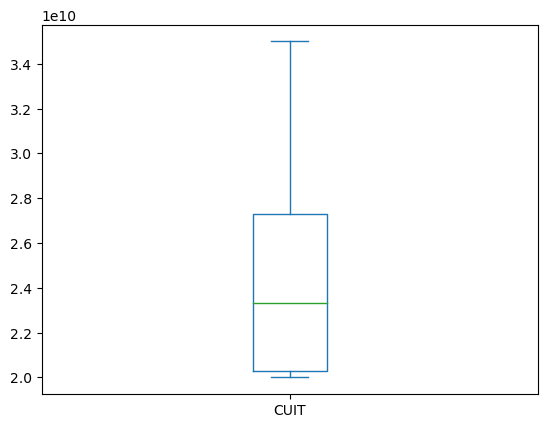

In [19]:
new_df.plot.box()

In [17]:
def cuit_cleaning(x):
    x = x / 10000000000
    x = round(x)
    return x

In [18]:
new_df["CUIT"] = new_df["CUIT"].apply(cuit_cleaning)

In [19]:
new_df['CUIT'].describe()

count    5.591728e+06
mean     2.464923e+00
std      4.987681e-01
min      2.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: CUIT, dtype: float64

In [20]:
new_df.dropna(inplace= True)

In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5591728 entries, 0 to 6020995
Data columns (total 8 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   CUIT                   int64 
 1   DENOMINACION           object
 2   IMP_GANANCIAS          object
 3   IMP_IVA                object
 4   MONOTRIBUTO            object
 5   INTEGRANTE_SOC         object
 6   EMPLEADOR              object
 7   ACTIVIDAD_MONOTRIBUTO  object
dtypes: int64(1), object(7)
memory usage: 384.0+ MB


<Axes: ylabel='Frequency'>

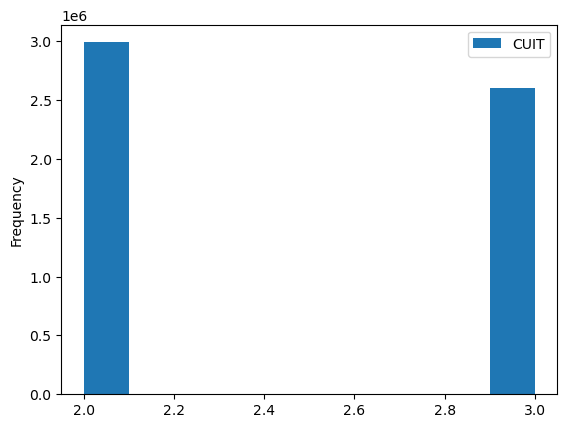

In [22]:
new_df.plot.hist()

In [23]:
confusion_matrix_g_i = pd.crosstab(new_df["IMP_GANANCIAS"], new_df["IMP_IVA"])

In [24]:
def cramers_corrected(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [25]:
correlation_g_i = cramers_corrected(confusion_matrix_g_i)

In [26]:
confusion_matrix_g_m = pd.crosstab(new_df["IMP_GANANCIAS"], new_df["MONOTRIBUTO"])

In [27]:
correlation_g_m = cramers_corrected(confusion_matrix_g_m)

In [28]:
confusion_matrix_i_m = pd.crosstab(new_df["IMP_IVA"], new_df["MONOTRIBUTO"])

In [29]:
correlation_i_m = cramers_corrected(confusion_matrix_i_m)

In [31]:
new_df['CUIT'].value_counts()

CUIT
2    2992005
3    2599723
Name: count, dtype: int64

In [33]:
F, p = ss.f_oneway(new_df[new_df.IMP_GANANCIAS=="NI"].CUIT,
                  new_df[new_df.IMP_GANANCIAS=="AC"].CUIT,
                  new_df[new_df.IMP_GANANCIAS=="EX"].CUIT,
                  new_df[new_df.IMP_GANANCIAS=="NC"].CUIT)
print("Statistics Values: ",np.round(F,2), "\n","P _Value        :",np.round(p,2))

Statistics Values:  20283.4 
 P _Value        : 0.0


In [34]:
new_df.groupby(["IMP_GANANCIAS","CUIT"])["CUIT"].count()

IMP_GANANCIAS  CUIT
AC             2        776690
               3        633496
EX             3         23921
NC             3         27146
NI             2       2215315
               3       1915160
Name: CUIT, dtype: int64

In [35]:
pd.set_option("display.max_rows", None)

In [36]:
new_df.groupby(["MONOTRIBUTO","CUIT"])["CUIT"].count()

MONOTRIBUTO  CUIT
A            2       894634
             3       773864
AC           2        19185
             3         6669
AL           2       135946
             3       150966
AP           2        41914
             3        13149
AT           2        56084
             3        91740
AV           2        64457
             3       102231
B            2       335911
             3       245052
C            2       211707
             3       150219
D            2       204099
             3       127069
E            2       111255
             3        68661
F            2       115943
             3        68402
G            2        57384
             3        33898
H            2        28955
             3        16335
I            2         3314
             3         2186
J            2         1479
             3          858
K            2          844
             3          468
NI           2       708894
             3       747956
Name: CUIT, dtype: int64

In [37]:
new_df.groupby(["EMPLEADOR","CUIT"])["CUIT"].count()

EMPLEADOR  CUIT
N          2       2805164
           3       2239912
S          2        186841
           3        359811
Name: CUIT, dtype: int64

In [38]:
new_df.groupby(["EMPLEADOR"])["EMPLEADOR"].count()

EMPLEADOR
N    5045076
S     546652
Name: EMPLEADOR, dtype: int64

In [39]:
new_df.groupby(["INTEGRANTE_SOC"])["INTEGRANTE_SOC"].count()

INTEGRANTE_SOC
N    5591728
Name: INTEGRANTE_SOC, dtype: int64

In [40]:
new_df.groupby(["IMP_GANANCIAS"])["IMP_GANANCIAS"].count()

IMP_GANANCIAS
AC    1410186
EX      23921
NC      27146
NI    4130475
Name: IMP_GANANCIAS, dtype: int64

In [41]:
new_df.groupby(["IMP_IVA"])["IMP_IVA"].count()

IMP_IVA
AC    1028217
AN         63
EX     255763
NI    4307474
XN        211
Name: IMP_IVA, dtype: int64